# Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale, StandardScaler
import sklearn.metrics as mt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [4]:
dataset = pd.read_csv("insurance.csv")
df = dataset.copy()

# Content
**Columns**

**age:** age of primary beneficiary

**sex:** insurance contractor gender, female, male

**bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children:** Number of children covered by health insurance / Number of dependents

**smoker:** Smoking

**region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges:** Individual medical costs billed by health insurance


In [5]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Gender, region, and smoking conditions are defined as categorically variable.**
**Other variables are numaric.**

In [7]:
df.isnull().sum().sum()

0

There is no non-value in our data.


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


**The highest observation value for the age variable was 64 and the lowest value is 18. Its average is 39.2.**

**While the highest value in bmi value is 53, the lowest value is 15.96. The average is 30.6.**

**For the children variable, the highest value is 5, the lowest value is 0, and the average is 1.09.**

**The maximum value for the charges variable is 63770, while the minimum value is 1121. Its average is 13270.**








In [9]:
df["bmi"].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

# Exploratory Data Analysis(EDA)

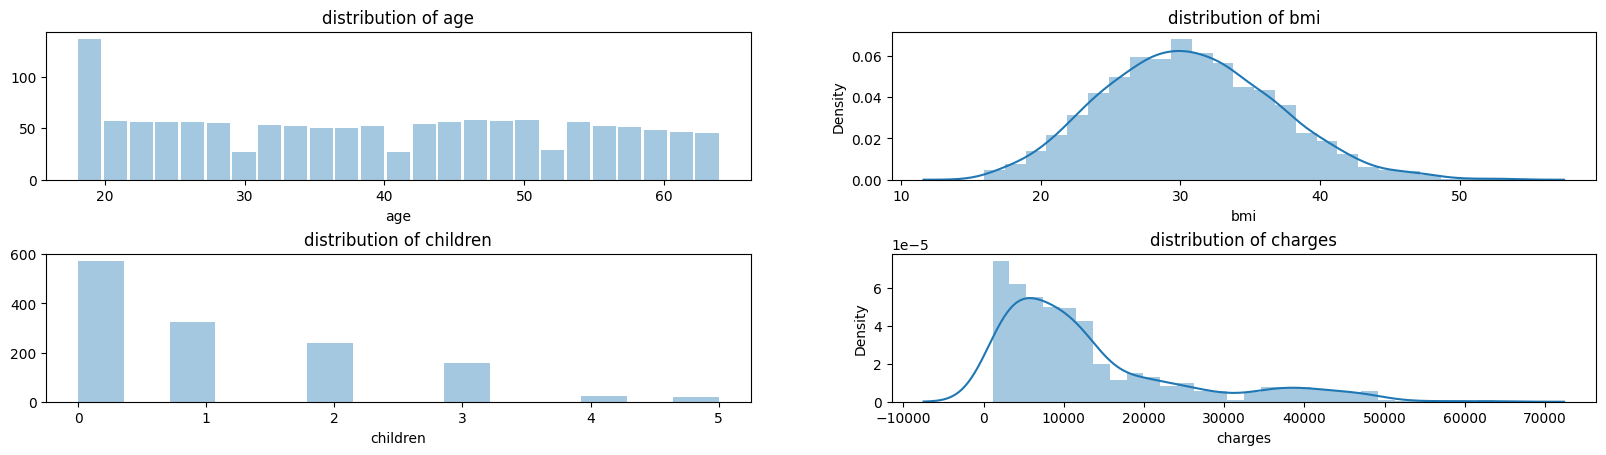

In [10]:
#Let's look at distribution of variables.
plt.figure(figsize=(20,5))
plt.subplots_adjust(top=0.85, hspace=0.5)

plt.subplot(2,2,1)
plt.title('distribution of age')
sns.distplot(df.age, kde=False,  hist_kws={'rwidth': 0.9}, bins=25);

plt.subplot(2,2,2)
plt.title('distribution of bmi')
sns.distplot(df.bmi, kde=True);

plt.subplot(2,2,3)
plt.title('distribution of children')
sns.distplot(df.children, kde=False);

plt.subplot(2,2,4)
plt.title('distribution of charges')
sns.distplot(df.charges, kde=True);


**According to age graph we can say that observation numbers around at most 20**

**According to bmi graph we can say that bmi values distribution  similar to normal distribution. But some points there are outliers.**

**According to children graph we can say that 0 and 1  number of children observation number more than other observations numbers.**

**According to the charges graph, we can say that the graph is skewed to the right.**

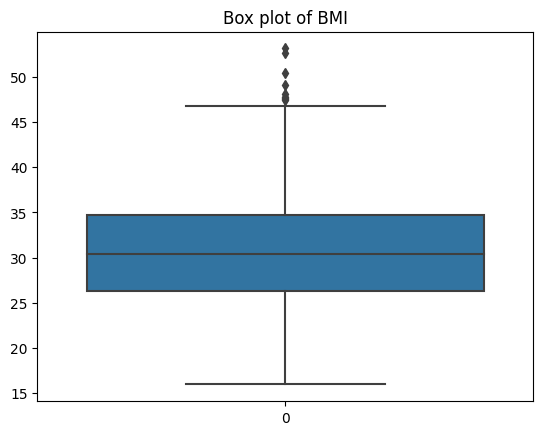

In [11]:
sns.boxplot(df['bmi'])
plt.title('Box plot of BMI')
plt.show()

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64


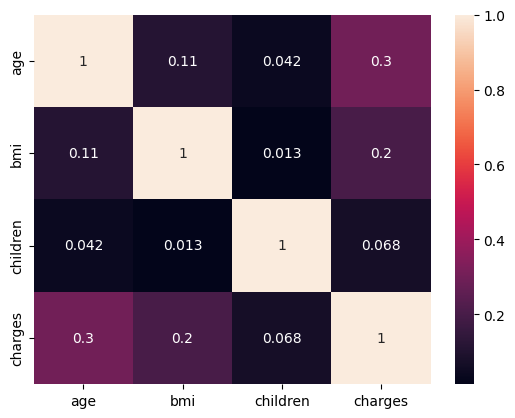

In [12]:
sns.heatmap(df.corr(), annot=True)
print(df.corr()['charges'])

**In terms of correlation, the charges value is the highest in terms of relationship with other variables.There does not appear to be a relationship between our independent variables that can create a linear connection problem.**


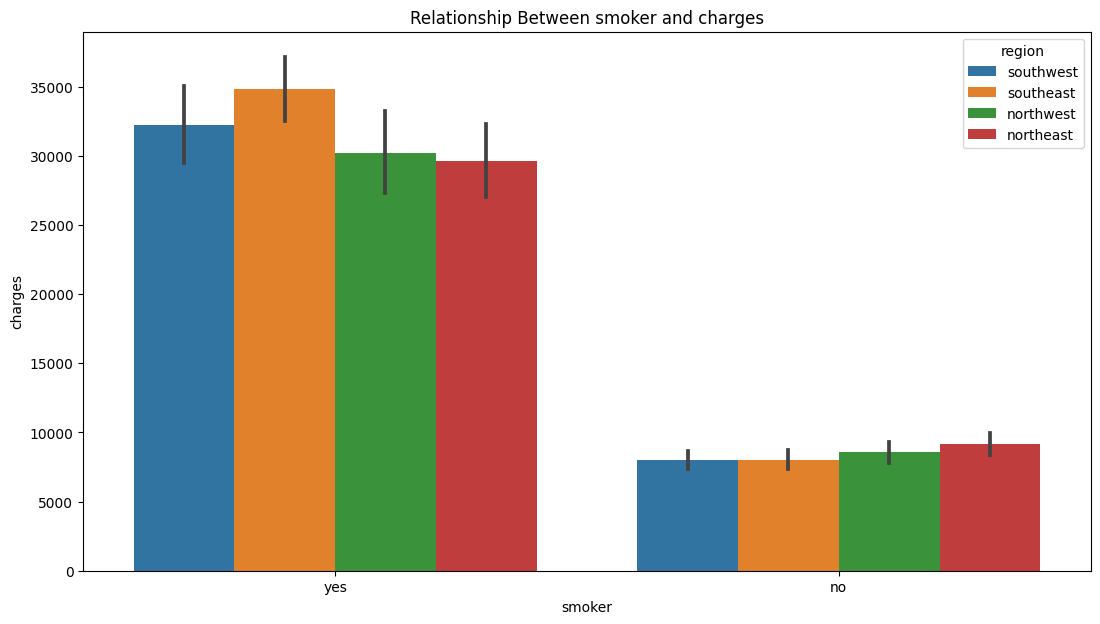

In [13]:
plt.figure(figsize=(13,7))
plt.title('Relationship Between smoker and charges')
sns.barplot(data=df, x=df['smoker'], y=df['charges'], hue='region');

**According to graph, we can say that smoker  charges values more than non-smoker charges values.**




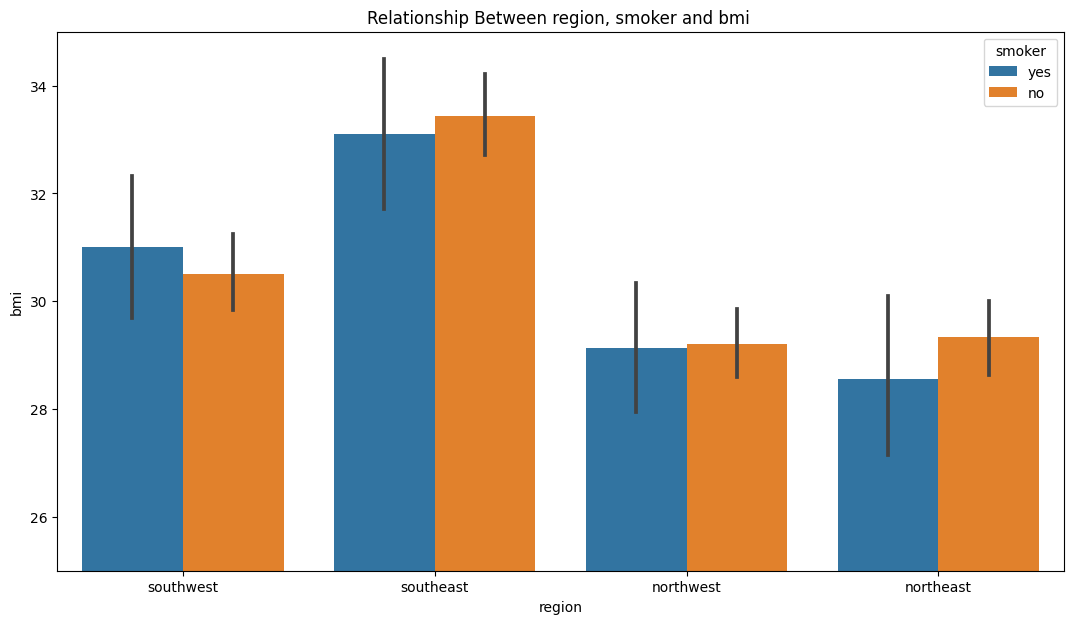

In [14]:
plt.figure(figsize=(13,7))
plt.title('Relationship Between region, smoker and bmi ')
sns.barplot(data=df, x=df['region'], y=df['bmi'], hue='smoker');
plt.ylim(25,35);

**According the graph southeast has most highest relationship according to given conditions.**

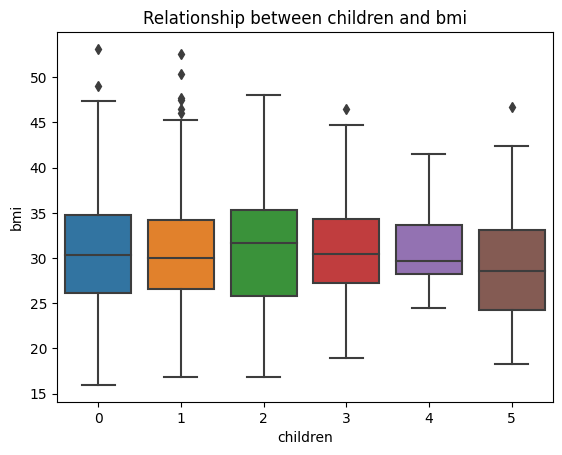

In [15]:
sns.boxplot(x='children', y='bmi', data=df)
plt.title('Relationship between children and bmi')
plt.show()

**In the graph, it is seen that the observation values ​​with 1 child have the some outlier value in their bmi.**

# Data Preprocessing


In [16]:
# New categorical variable extraction in age and bmi variables
age_cat = ["0-18", "18-30", "30-45", "45-60", "60+"]

df["age_group"] = pd.cut(df["age"], bins=[0, 18, 30, 45, 60, 99], labels=age_cat, right=False)

bmi_cat = ['Underweight', 'Normal', 'Overweight', 'Obese (Class I)', 'Obese (Class II)',
           'Obese (Class III)']
df['bmi_group'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9, 99], labels=bmi_cat, right=False)

# Kategorik değişkenlerin one-hot dönüşümü

df = pd.get_dummies(df,
                            columns=['sex','smoker','region', 'age_group','bmi_group'],
                            prefix=['sex','smoker','region', 'age_group','bmi_group'],
                            drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,age_group_18-30,age_group_30-45,age_group_45-60,age_group_60+,bmi_group_Normal,bmi_group_Overweight,bmi_group_Obese (Class I),bmi_group_Obese (Class II),bmi_group_Obese (Class III)
0,19,27.900,0,16884.92400,0,1,0,0,1,1,0,0,0,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,1,0,1,0,0,0,0,0,1,0,0
2,28,33.000,3,4449.46200,1,0,0,1,0,1,0,0,0,0,0,1,0,0
3,33,22.705,0,21984.47061,1,0,1,0,0,0,1,0,0,1,0,0,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0,0,1,0,0,0,1,0,0,0


In [18]:
# We divide the data set into Training and Test (test=0.2, training=0.8)
y = df['charges']
X = df.drop(columns='charges', axis=1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection


In [31]:
# Cross validation
def crossval(model):
    scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
    forest_reg_rmse_scores = np.sqrt(-scores)
    return forest_reg_rmse_scores.mean()

# Model Success function
def success(real, estimation):
    rmse = mt.mean_squared_error(real,estimation, squared=False)
    r2 = mt.r2_score(real, estimation)
    return[rmse,r2]

In [32]:
# Linear regresyon
lr = LinearRegression()
linear_model = lr.fit(X_train,y_train)
linear_estimation = linear_model.predict(X_test)

# Ridge Regresyon
ridge = Ridge()
ridge_model = ridge.fit(X_train, y_train)
ridge_estimation = ridge_model.predict(X_test)

# Lasso Regresyon
lasso = Lasso()
lasso_model= lasso.fit(X_train, y_train)
lasso_estimation= lasso_model.predict(X_test)

# ElasticNet Regresyon
elas = ElasticNet()
elas_model = elas.fit(X_train, y_train)
elas_estimation = elas_model.predict(X_test)

# Decision Tree Regresyon
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_model = tree_regressor.fit(X_train, y_train)
tree_estimation = tree_model.predict(X_test)

# Random Forest Regresyon
random_for = RandomForestRegressor(random_state=42)
Forest_model = random_for.fit(X_train,y_train)
RandomForest_estimation = Forest_model.predict(X_test)

In [33]:
results = [['Linear Model', success(y_test,linear_estimation)[0],success(y_test,linear_estimation)[1],crossval(linear_model)],
           ['Ridge Model', success(y_test,ridge_estimation)[0],success(y_test,ridge_estimation)[1],crossval(ridge_model)],
           ['Lasso Model',success(y_test,lasso_estimation)[0],success(y_test,lasso_estimation)[1],crossval(lasso_model)],
           ['ElasticNet Model', success(y_test,elas_estimation)[0],success(y_test,elas_estimation)[1],crossval(elas_model)],
           ['Random Forest Model', success(y_test, RandomForest_estimation)[0], success(y_test,RandomForest_estimation)[1], crossval(Forest_model)],
           ['Decision Tree Model', success(y_test,tree_estimation)[0],success(y_test,tree_estimation)[1],crossval(tree_model)]]

columns = ['Model', 'RMSE', 'R2', 'verification(cv)']

pd.set_option('display.float_format', '{:.3f}'.format)
results = pd.DataFrame(data=results,columns=columns)
results

,Model,RMSE,R2,verification(cv)
0,Linear Model,5795.377,0.784,6063.309
1,Ridge Model,5763.996,0.786,6065.861
2,Lasso Model,5783.119,0.785,6063.222
3,ElasticNet Model,9493.610,0.419,9440.048
4,Random Forest Model,4617.474,0.863,5011.246
5,Decision Tree Model,4776.261,0.853,4798.195


# Hyper-parameter Optimization

In [34]:
# Hyper parameter setting for Random Forest
forest_param_grid = [
    { "n_estimators": [10, 20, 30, 40, 50], "max_depth": [3, 5, 7, 9, 11] },
    { "bootstrap": [False], "n_estimators": [3, 10], "max_depth": [3, 5, 7, 9, 11]}
]
forest_reg = RandomForestRegressor(random_state=42)

forest_grid_search = GridSearchCV(forest_reg, forest_param_grid, cv=5, scoring='neg_mean_squared_error', refit=True)
forest_grid_search.fit(X, y)
print("The best hyperparameter values:", forest_grid_search.best_params_)

The best hyperparameter values: {'max_depth': 5, 'n_estimators': 40}


In [35]:
random_for = RandomForestRegressor(random_state=42, max_depth=5,n_estimators = 40)
Forest_model = random_for.fit(X_train,y_train)
RandomForest_estimation = Forest_model.predict(X_test)
fınal_success= success(y_test, RandomForest_estimation)

# Model Evaluation

In [36]:
test_data = y_test
tahmin_data = RandomForest_estimation
x_values = np.arange(len(test_data))

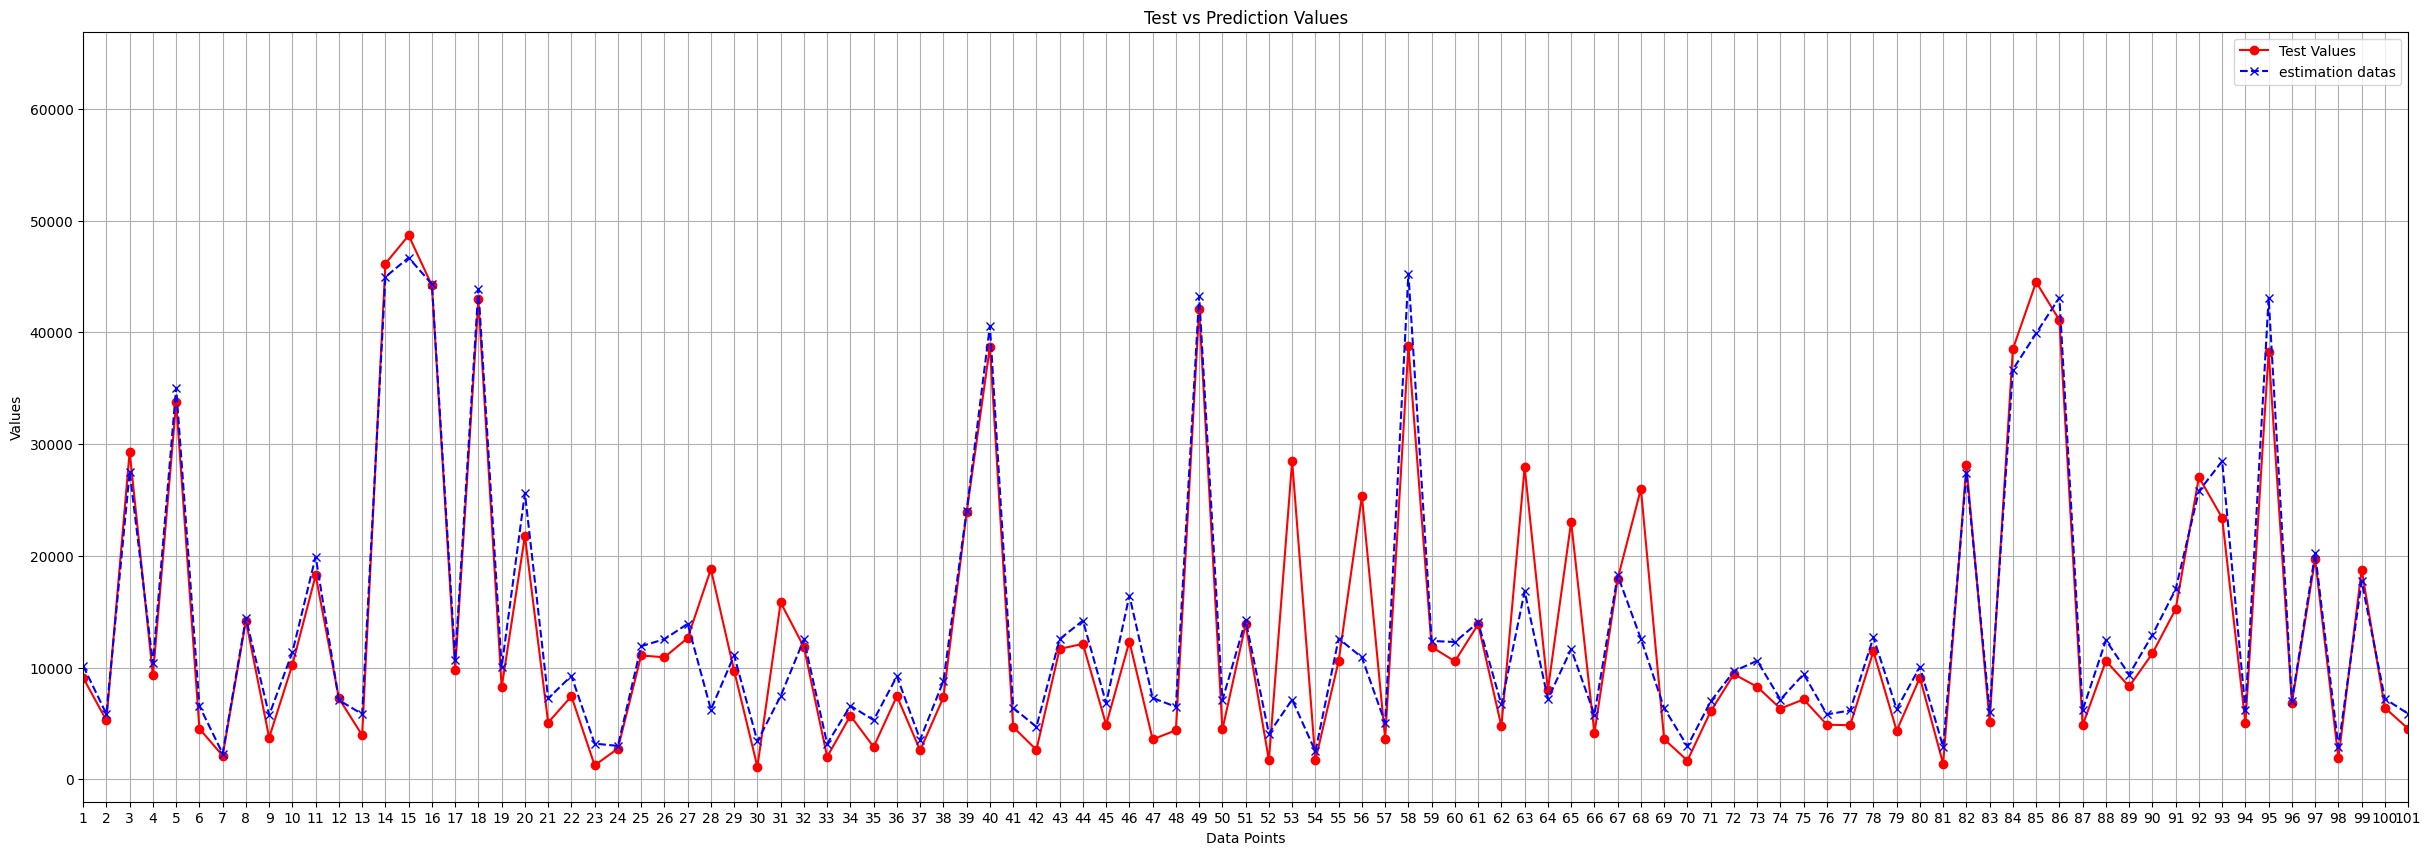

In [39]:
plt.figure(figsize=(30, 10))
plt.plot(x_values, test_data, marker='o', color='red', label='Test Values')
plt.plot(x_values, tahmin_data, marker='x', color='blue', linestyle='dashed', label='estimation datas')
plt.xticks(x_values, x_values + 1)  # axis labels
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Test vs Prediction Values')
plt.xlim(0,100)
plt.legend()
plt.grid(True)
plt.show()

In [41]:
print(f'RMSE: {fınal_success[0]}\nR2 Skor: {fınal_success[1]}')

RMSE: 4436.725139959536
R2 Skor: 0.8732065004435026
